<a href="https://colab.research.google.com/github/zIxxong2/Capstone/blob/master/0512_15%3A45.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive    # 드라이브 마운팅
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 필요한 라이브러리 설치하기
!git clone https://github.com/ndb796/bing_image_downloader


Cloning into 'bing_image_downloader'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 86 (delta 38), reused 46 (delta 16), pack-reused 0
Unpacking objects: 100% (86/86), done.


In [3]:
# 한글 폰트 설치하기 (꼭! 설치가 완료되면 [런타임 다시 시작]을 누르고 다시 실행하기)
!apt install fonts-nanum -y

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정하기
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')
matplotlib.font_manager._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,634 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 160706 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [4]:
import os
import shutil
#from bing_image_downloader import downloader


directory_list = [
    '/content/drive/MyDrive/Colab Notebooks/custom_dataset/train/',
    '/content/drive/MyDrive/Colab Notebooks/custom_dataset/test/',
]

# 초기 디렉토리 만들기
for directory in directory_list:
    if not os.path.isdir(directory):
        os.mkdir(directory)

# 수집한 이미지를 학습 데이터와 평가 데이터로 구분하는 함수
def dataset_split(query, train_cnt):
    # 학습 및 평가 데이터셋 디렉토리 만들기
    for directory in directory_list:
        if not os.path.isdir(directory + '/' + query):
            os.mkdir(directory + '/' + query)
    # 학습 및 평가 데이터셋 준비하기
    cnt = 0
    for file_name in os.listdir(query):
        if cnt < train_cnt:
            print(f'[Train Dataset] {file_name}')
            shutil.move(query + '/' + file_name, '/content/drive/MyDrive/Colab Notebooks/custom_dataset/train/' + query + '/' + file_name)
        else:
            print(f'[Test Dataset] {file_name}')
            shutil.move(query + '/' + file_name, '/content/drive/MyDrive/Colab Notebooks/custom_dataset/test/' + query + '/' + file_name)
        cnt += 1
    shutil.rmtree(query)

In [ ]:
query = '계란형 얼굴'
downloader.download(query, limit=40,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 30)



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from http://blogfiles.naver.net/20130329_297/happyntour_1364523017370lHuLX_JPEG/2013-03-29_10%3B56%3B32.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://blogfiles.naver.net/20130329_22/happyntour_1364523372896cEPTt_JPEG/2013-03-29_09%3B41%3B25.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://t1.daumcdn.net/cfile/tistory/224AE941577145CC24
[%] File Downloaded !

[%] Downloading Image #4 from https://t1.daumcdn.net/cfile/tistory/0178F647507E061225
[!] Issue getting: https://t1.daumcdn.net/cfile/tistory/0178F647507E061225
[!] Error:: HTTP Error 404: Not Found
[%] Downloading Image #4 from http://blogfiles.naver.net/20110420_128/eco_hmj_1303284087165MxUJ7_JPEG/%B8%DE%C0%CE3.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://thumb.mt.co.kr/06/2016/04/2016041513560714742_4.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://t1.daumcdn.net/cfile/tistory

In [5]:
# 전이 학습!!!

import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms

import numpy as np
import time
from PIL import Image


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device 객체


In [6]:
if torch.cuda.is_available():
  print("available")

available


In [7]:
!nvidia-smi 

Wed May 12 04:40:07 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    10W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
! pip install albumentations==0.4.6

     |████████████████████████████████| 122kB 8.3MB/s 
     |████████████████████████████████| 952kB 43.1MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-cp37-none-any.whl size=65163 sha256=90b0eac34f6318b7f4f3205787027ac64d908d90f4b08ffc1a6b998492e70ddf
  Stored in directory: /root/.cache/pip/wheels/c7/f4/89/56d1bee5c421c36c1a951eeb4adcc32fbb82f5344c086efa14
Successfully built albumentations
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [9]:
import albumentations as A
#from albumentations.pytorch import ToTensorV2
import cv2
from torch.utils.data import Dataset

In [ ]:
prefix_dir = '/content/drive/MyDrive/Colab Notebooks/custom_dataset/'
train_dir=  f'{prefix_dir}/train'
train_imgs = os.listdir(train_dir)

In [ ]:
class AlbumentationsDataset(Dataset):
    """__init__ and __len__ functions are the same as in TorchvisionDataset"""
    def __init__(self, data_dir, imgs, data_transforms=None):
        self.data_dir = data_dir
        self.imgs = imgs
        self.data_transforms = data_transforms

    def __len__(self):
        return len(self.imgs)

    '''def __getitem__(self, idx):
        filename = self.imgs[idx]
        # Read an image with OpenCV
        img = cv2.imread(os.path.join(self.data_dir, self.imgs[idx]))

        if self.data_transforms:
            augmented = self.data_transforms[self.phase](image=img)
            img = augmented['image']
        return filename, img'''

    def __getitem__(self, i):
        image = plt.imread(self.image_list[i])
        image = Image.fromarray(image).convert('RGB')
        image = self.aug(image=np.array(image))['image']
        image = np.transpose(image, (2, 0, 1)).astype(np.float32)
            
        return torch.tensor(image, dtype=torch.float)

train_datasets = AlbumentationsDataset(train_dir, train_imgs, transforms_train)
train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=4, shuffle=True, num_workers=4)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [65]:
# 데이터셋을 불러올 때 사용할 변형(transformation) 객체 정의

transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(), # 데이터 증진(augmentation)
    transforms.RandomChoice([
        transforms.ColorJitter(0.2, 0.2, 0.2, 0.2),
        transforms.RandomAffine(
            degrees=15, translate=(0.2, 0.2),
            scale=(0.8, 1.2), shear=15, resample=Image.BILINEAR)
    ]),
    transforms.ToTensor(), # PIL 형태의 이미지나 ndarray 를 PyTorch 가 이해할 수 있는 tensor 자료형으로 바꾸어 주는 역할
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])

'''
transforms_train = A.Compose([
            A.Resize(224,224, always_apply=True),
            A.OneOf([A.HorizontalFlip(p=1),
                     A.RandomRotate90(p=1),
                     A.VerticalFlip(p=1)            
            ], p=0.5),
            A.OneOf([A.MotionBlur(p=1),
                     A.GaussNoise(p=1)                 
            ], p=0.5),
            A.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
            ToTensorV2()
        ])

'''
transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
'''

transforms_test = A.Compose([
            A.Resize(224,224, always_apply=True),
            A.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
            ToTensorV2()
        ])

'''
data_dir = '/content/drive/MyDrive/Colab Notebooks/custom_dataset'

train_datasets = datasets.ImageFolder(os.path.join(data_dir, 'train'), transforms_train)
test_datasets = datasets.ImageFolder(os.path.join(data_dir, 'test'), transforms_test)

train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=4, shuffle=True, num_workers=4)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size=4, shuffle=True, num_workers=4)

print('학습 데이터셋 크기:', len(train_datasets))
print('테스트 데이터셋 크기:', len(test_datasets))

class_names = train_datasets.classes
print('클래스:', class_names)



학습 데이터셋 크기: 300
테스트 데이터셋 크기: 75
클래스: ['각진형', '계란형', '둥근형', '마름모형', '하트형']


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:1315: UserWarning: Argument resample is deprecated and will be removed since v0.10.0. Please, use interpolation instead
  "Argument resample is deprecated and will be removed since v0.10.0. Please, use interpolation instead"
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [46]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4358 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-pack

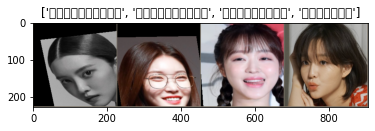

tensor([3, 3, 2, 4])


In [66]:
def imshow(input, title):
    # torch.Tensor를 numpy 객체로 변환
    input = input.numpy().transpose((1, 2, 0))
    # 이미지 정규화 해제하기
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # 이미지 출력
    plt.imshow(input)
    plt.title(title)
    plt.show()


# 학습 데이터를 배치 단위로 불러오기

iterator = iter(train_dataloader)

# 현재 배치를 이용해 격자 형태의 이미지를 만들어 시각화
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

print(classes)

In [67]:
model = models.resnet34(pretrained=True)
num_features = model.fc.in_features

# 전이 학습(transfer learning): 모델의 출력 뉴런 수를 5개로 교체하여 마지막 레이어 다시 학습
model.fc = nn.Linear(num_features, 5)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [68]:
num_epochs = 68
model.train()
start_time = time.time()

# 전체 반복(epoch) 수 만큼 반복하며
for epoch in range(num_epochs):
    running_loss = 0.
    running_corrects = 0

    # 배치 단위로 학습 데이터 불러오기
    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 모델에 입력(forward)하고 결과 계산
        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        # 역전파를 통해 기울기(gradient) 계산 및 학습 진행
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_datasets)
    epoch_acc = running_corrects / len(train_datasets) * 100.

    # 학습 과정 중에 결과 출력
    print('#{} Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() - start_time))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


#0 Loss: 1.6906 Acc: 27.6667% Time: 4.3322s
#1 Loss: 1.5105 Acc: 44.3333% Time: 8.6348s
#2 Loss: 1.4381 Acc: 45.6667% Time: 12.9102s
#3 Loss: 1.3705 Acc: 50.6667% Time: 17.1368s
#4 Loss: 1.1568 Acc: 61.0000% Time: 21.4173s
#5 Loss: 0.9998 Acc: 63.3333% Time: 25.7104s
#6 Loss: 0.8795 Acc: 69.0000% Time: 29.9884s
#7 Loss: 0.9249 Acc: 68.6667% Time: 34.3545s
#8 Loss: 0.7666 Acc: 72.0000% Time: 38.6193s
#9 Loss: 0.9357 Acc: 67.0000% Time: 42.9027s
#10 Loss: 0.8332 Acc: 71.6667% Time: 47.2110s
#11 Loss: 0.6867 Acc: 74.6667% Time: 51.5344s
#12 Loss: 0.7107 Acc: 78.0000% Time: 55.8022s
#13 Loss: 0.6494 Acc: 79.6667% Time: 60.1793s
#14 Loss: 0.6162 Acc: 80.0000% Time: 64.4802s
#15 Loss: 0.5780 Acc: 80.3333% Time: 68.8005s
#16 Loss: 0.4762 Acc: 85.0000% Time: 73.0677s
#17 Loss: 0.6238 Acc: 79.0000% Time: 77.3434s
#18 Loss: 0.5823 Acc: 82.3333% Time: 81.5938s
#19 Loss: 0.5267 Acc: 82.3333% Time: 85.9359s
#20 Loss: 0.5065 Acc: 82.6667% Time: 90.2461s
#21 Loss: 0.4094 Acc: 86.3333% Time: 94.5557s


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[예측 결과: 하트형] (실제 정답: 하트형)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4370 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4449 missing from current font.
  font.set_te

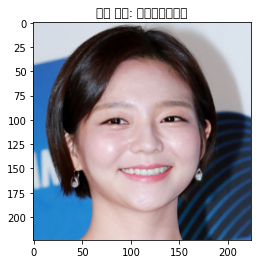

[예측 결과: 둥근형] (실제 정답: 둥근형)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4355 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4462 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4523 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 4355 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 4462 missing from current font.
  font.set_text(s, 

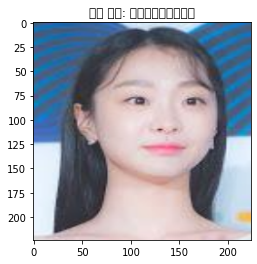

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4520 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4469 missing from current font.
  font.set_text(s, 0.0, flags=flags)


[예측 결과: 각진형] (실제 정답: 각진형)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 4520 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 4364 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 4469 missing from current font.
  font.set_text(s, 0, flags=flags)


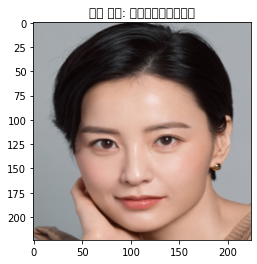

[예측 결과: 각진형] (실제 정답: 계란형)


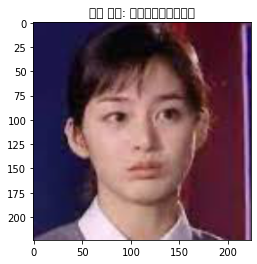

[예측 결과: 계란형] (실제 정답: 계란형)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 4456 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 4357 missing from current font.
  font.set_text(s, 0, flags=flags)


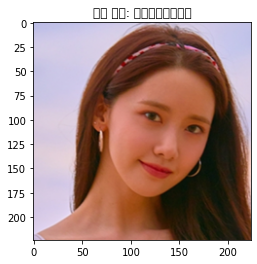

[예측 결과: 하트형] (실제 정답: 하트형)


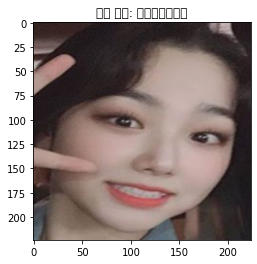

[예측 결과: 각진형] (실제 정답: 계란형)


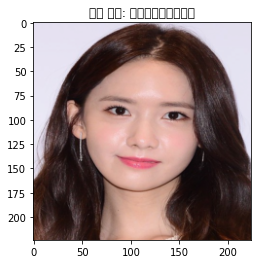

[예측 결과: 하트형] (실제 정답: 하트형)


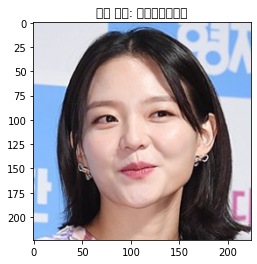

[예측 결과: 마름모형] (실제 정답: 마름모형)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4358 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4535 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 4358 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 4535 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 4457 missing from current font.
  font.set_text(s, 0,

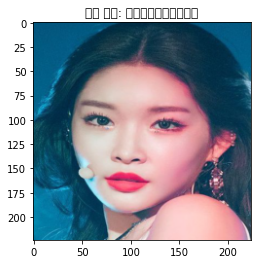

[예측 결과: 둥근형] (실제 정답: 각진형)


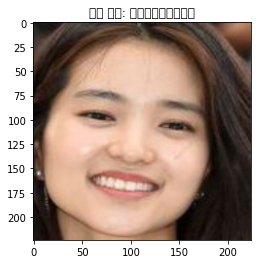

[예측 결과: 둥근형] (실제 정답: 둥근형)


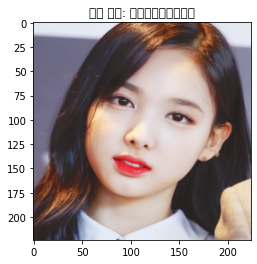

[예측 결과: 둥근형] (실제 정답: 마름모형)


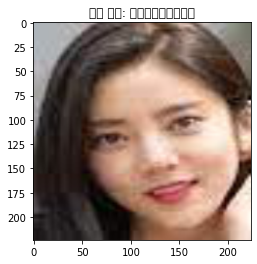

[예측 결과: 계란형] (실제 정답: 계란형)


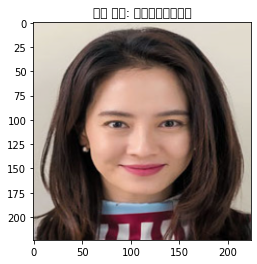

[예측 결과: 각진형] (실제 정답: 각진형)


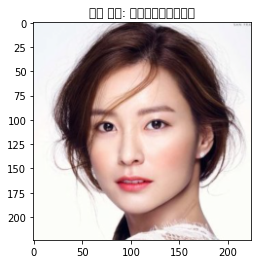

[예측 결과: 계란형] (실제 정답: 계란형)


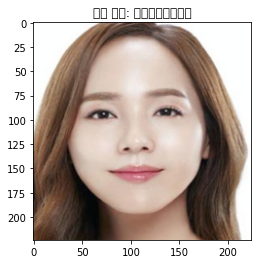

[예측 결과: 둥근형] (실제 정답: 하트형)


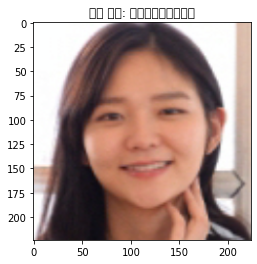

[예측 결과: 각진형] (실제 정답: 각진형)


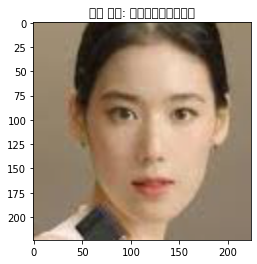

[예측 결과: 하트형] (실제 정답: 하트형)


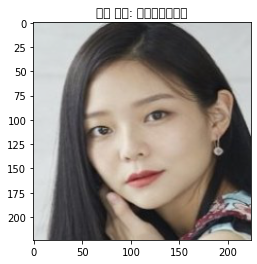

[예측 결과: 둥근형] (실제 정답: 둥근형)


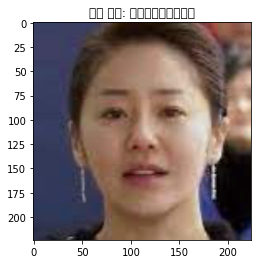

[예측 결과: 각진형] (실제 정답: 각진형)


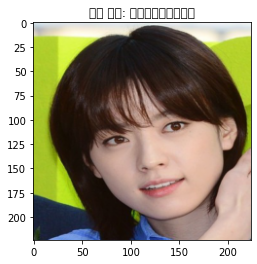

[예측 결과: 계란형] (실제 정답: 각진형)


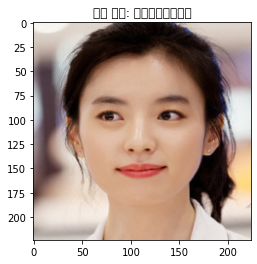

[예측 결과: 계란형] (실제 정답: 계란형)


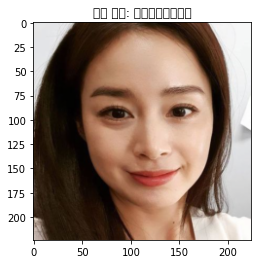

[예측 결과: 하트형] (실제 정답: 둥근형)


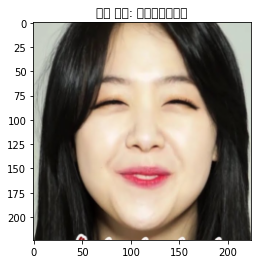

[예측 결과: 계란형] (실제 정답: 둥근형)


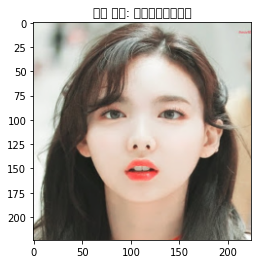

[예측 결과: 계란형] (실제 정답: 계란형)


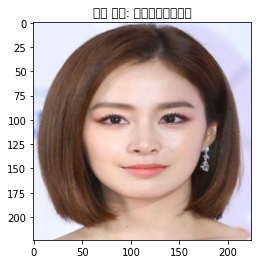

[예측 결과: 계란형] (실제 정답: 계란형)


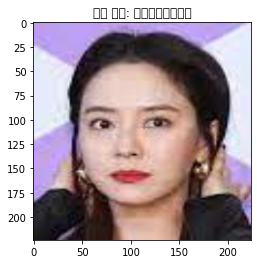

[예측 결과: 하트형] (실제 정답: 마름모형)


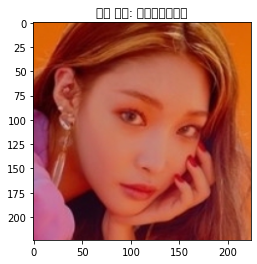

[예측 결과: 계란형] (실제 정답: 계란형)


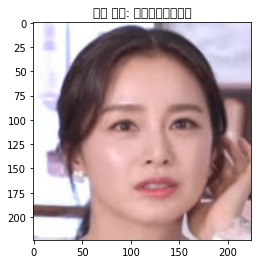

[예측 결과: 마름모형] (실제 정답: 마름모형)


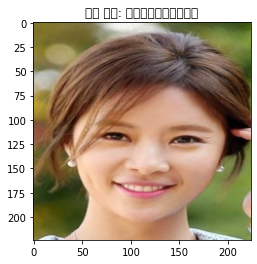

[예측 결과: 하트형] (실제 정답: 하트형)


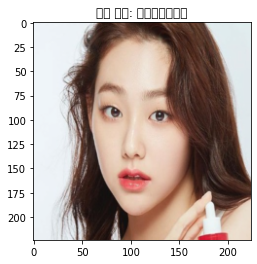

[예측 결과: 둥근형] (실제 정답: 둥근형)


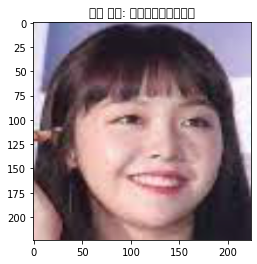

[예측 결과: 둥근형] (실제 정답: 마름모형)


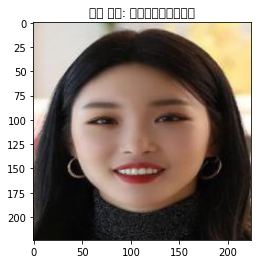

[예측 결과: 하트형] (실제 정답: 계란형)


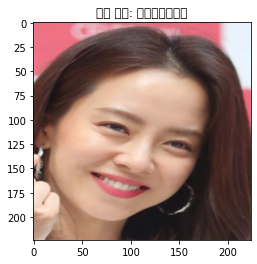

[예측 결과: 각진형] (실제 정답: 각진형)


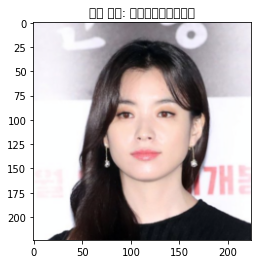

[예측 결과: 각진형] (실제 정답: 각진형)


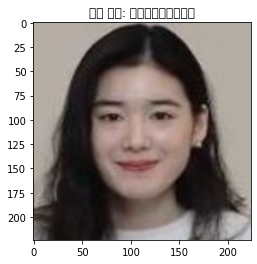

[예측 결과: 계란형] (실제 정답: 마름모형)


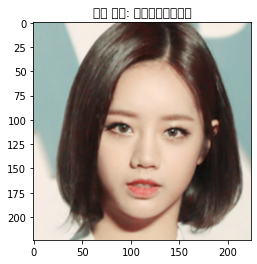

[예측 결과: 마름모형] (실제 정답: 각진형)


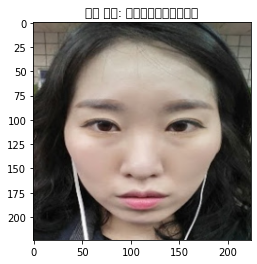

[예측 결과: 계란형] (실제 정답: 계란형)


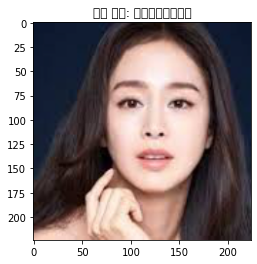

[Test Phase] Loss: 0.8973 Acc: 77.3333% Time: 8.9085s


In [50]:
model.eval()
start_time = time.time()

with torch.no_grad():
    running_loss = 0.
    running_corrects = 0

    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        # 한 배치의 첫 번째 이미지에 대하여 결과 시각화
        print(f'[예측 결과: {class_names[preds[0]]}] (실제 정답: {class_names[labels.data[0]]})')
        imshow(inputs.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    epoch_loss = running_loss / len(test_datasets)
    epoch_acc = running_corrects / len(test_datasets) * 100.
    print('[Test Phase] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch_loss, epoch_acc, time.time() - start_time))

In [31]:
pip install wget

  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9681 sha256=c5108094798912b00d7f9be8f062b78686f9c077d970910c7d5ab167b202ea57
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [59]:
!wget http://talkimg.imbc.com/TVianUpload/tvian/TViews/image/2019/03/24/X6Zeh1HKNNnZ636890176274347563.jpg -O test_image.jpg
!wget https://thumb.mtstarnews.com/06/2019/04/2019041818453102562_1.jpg -O test_image_2.jpg
!wget https://w.namu.la/s/a1eebad9f8de0929601acf2b17e9992122cd9c07d6ba42f9df36bf0416d831ae18f84c69d245480992f26c294686aa6f67d2266b913d0e0089835d230a997a25f61e75aecd37cb8fc4c37752043fbbcbc35c423f94c968a40f7b1743f7fbbc3cb6ca53bede2b44769307c9198f4e1542 -O test_image_1.jpg

--2021-05-12 06:08:01--  http://talkimg.imbc.com/TVianUpload/tvian/TViews/image/2019/03/24/X6Zeh1HKNNnZ636890176274347563.jpg
Resolving talkimg.imbc.com (talkimg.imbc.com)... 211.216.46.70
Connecting to talkimg.imbc.com (talkimg.imbc.com)|211.216.46.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 240901 (235K) [image/jpeg]
Saving to: ‘test_image.jpg’

test_image.jpg      100%[===================>] 235.25K   507KB/s    in 0.5s    

2021-05-12 06:08:02 (507 KB/s) - ‘test_image.jpg’ saved [240901/240901]

--2021-05-12 06:08:03--  https://thumb.mtstarnews.com/06/2019/04/2019041818453102562_1.jpg
Resolving thumb.mtstarnews.com (thumb.mtstarnews.com)... 1.255.49.11
Connecting to thumb.mtstarnews.com (thumb.mtstarnews.com)|1.255.49.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 364847 (356K) [image/jpeg]
Saving to: ‘test_image_2.jpg’

test_image_2.jpg    100%[===================>] 356.30K   369KB/s    in 1.0s    

2021-05-12 06:08:05 (

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4523 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4370 missing from current font.
  font.set_text(s

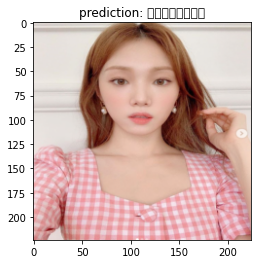

계란형
tensor(1, device='cuda:0')


In [60]:
image = Image.open('test_image_2.jpg')
image = transforms_test(image).unsqueeze(0).to(device)    # tensor 형태로 

with torch.no_grad():
    outputs = model(image)
    _, preds = torch.max(outputs, 1)
    num = preds[0]
    imshow(image.cpu().data[0], title='prediction: ' + class_names[preds[0]])
    print(class_names[preds[0]])
    print(preds[0])


In [61]:

# 필요한 라이브러리 설치하기
!pip install flask-ngrok

In [63]:
import io
from flask_ngrok import run_with_ngrok
from flask import Flask, jsonify, request


# 이미지를 읽어 결과를 반환하는 함수
def get_prediction(image_bytes):
    image = Image.open(io.BytesIO(image_bytes))
    image = transforms_test(image).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(image)
        _, preds = torch.max(outputs, 1)
        imshow(image.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    return class_names[preds[0]]


app = Flask(__name__)


@app.route('/', methods=['POST'])
def predict():
    if request.method == 'POST':
        # 이미지 바이트 데이터 받아오기
        file = request.files['file']
        image_bytes = file.read()

        # 분류 결과 확인 및 클라이언트에게 결과 반환
        class_name = get_prediction(image_bytes=image_bytes)
        print("결과:", {'class_name': class_name})
        return jsonify({'class_name': class_name})

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://a81be657fedc.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4456 missing from current font.
  font.set_te

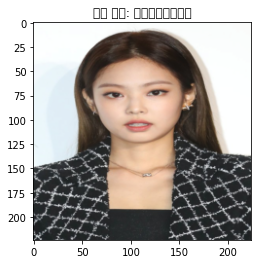

127.0.0.1 - - [12/May/2021 06:19:06] "POST / HTTP/1.1" 200 -


결과: {'class_name': '계란형'}


127.0.0.1 - - [12/May/2021 06:19:21] "GET / HTTP/1.1" 405 -
127.0.0.1 - - [12/May/2021 06:19:21] "GET /favicon.ico HTTP/1.1" 404 -


In [64]:

run_with_ngrok(app)
app.run()